# Análisis de Modelos MA, ARMA y ARIMA en Series Temporales

Katlyn Goeujon-Mackness <br>
03-05-2025

## Introducción
El análisis de series temporales es una herramienta clave en ciencia de datos y es ampliamente utilizada en disciplinas como las finanzas, el comercio y la meteorología. Su propósito principal es identificar patrones y tendencias para hacer predicciones confiables sobre el futuro. <br>

En este notebook, exploraremos tres modelos clave en el análisis de series temporales.

1. MA (Promedios Móviles): Captura las variaciones aleatorias en los datos, suavizando ruidos y fluctuaciones.
2. ARMA (Autorregresivo de Promedios Móviles): Considera relaciones con valores pasados y variaciones aleatorias, pero requiere datos estacionarios para una correcta aplicación.
3. ARIMA (Autorregresivo Integrado de Promedios Móviles): Permite modelar tendencias al transformar datos no estacionarios en estacionarios mediante diferenciación antes de aplicar ARMA.

En este notebook, exploraremos los siguientes temas:
- Identificación y aplicación de modelos MA, ARMA y ARIMA en series temporales;
- Análisis de la estacionariedad de series temporales usando pruebas estadísticas;
- Análisis de modelos ARIMA para ajustar series temporales transformadas;
- Evaluación del ajuste de modelos ARIMA mediante el índice AIC;
- Evaluación de la precisión de predicciones con métricas de error.

Este análisis nos permitirá entender mejor los datos temporales y cómo aprovechar estos models para generar predicciones útiles y fundamentadas.

### Objetivo
Exploraremos y implementaremos modelos MA, ARMA y ARIMA para el análisis de series temporales. Tambiém, evaluaremos la precisión de predicciones.

### Importación de Librerías

In [68]:
# Importamos las librerías necesarias para la manipulación de datos, modelado 
# y visualización.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller



##  Modelo MA
### Ejemplo con datos simulados

In [ ]:
# Definimos el parámetro MA
ar1 = np.array([1,0])
ma1 = np.array([1,-0.9]) # Definimos el parámetro MA

In [ ]:
# Generamos una serie temporal simulada utilizando un modelo MA(1)
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data = MA_object1.generate_sample(nsample=10000)

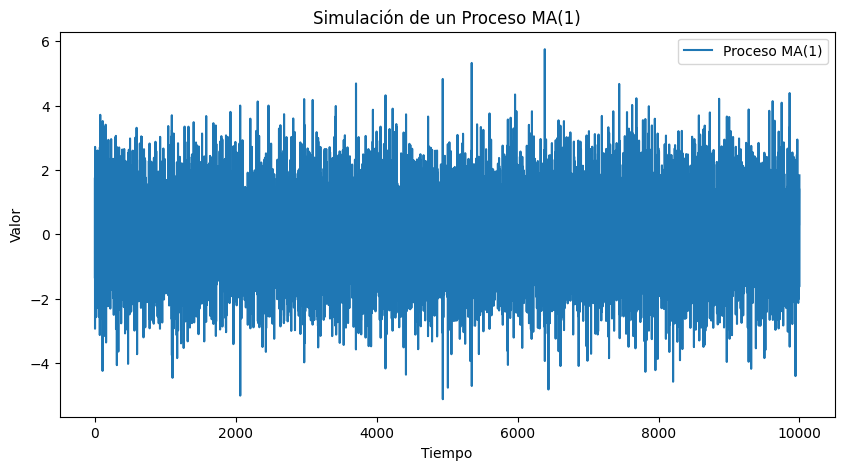

In [7]:
# Graficamos la serie generada
plt.figure(figsize=(10,5))
plt.plot(simulated_data, label='Proceso MA(1)')
plt.title("Simulación de un Proceso MA(1)")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.show()


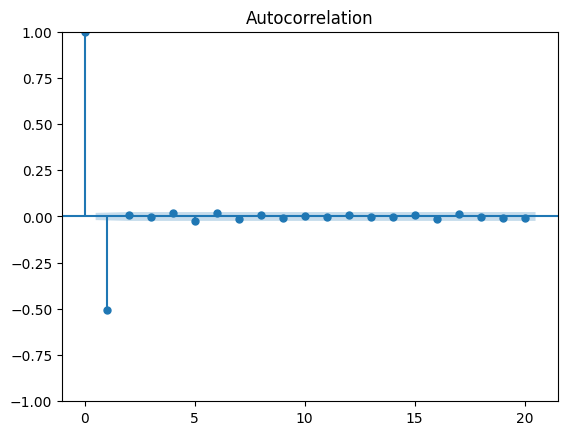

In [9]:
# Graficar el correlogramo
plot_acf(simulated_data, lags=20)
plt.show()

Comentario: Hay una correlación negativa significativa para el primer parámetro, lo que indica una dependencia negativa entre los valores consecutivos.

In [11]:
# Proceso de estimación de parámetro
mod = ARIMA(simulated_data, order=(0,0,1))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -14147.974
Date:                Sun, 04 May 2025   AIC                          28301.948
Time:                        10:28:40   BIC                          28323.579
Sample:                             0   HQIC                         28309.270
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.519      0.604      -0.001       0.002
ma.L1         -0.9077      0.004   -215.893      0.000      -0.916      -0.900
sigma2         0.9916      0.014     71.776      0.0

In [ ]:
# Imprimir coeficiente
print(result.params[1])

-0.9077458999503425


### Ejemplo con Datos Reales

In [ ]:
# Cargar Datos
apple = yf.download(tickers='aapl', start='2021-04-06', end='2023-04-06', rounding=True)
apple

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-04-06,123.46,124.36,122.92,123.75,80171300
2021-04-07,125.12,125.14,122.42,123.09,83466700
2021-04-08,127.52,127.55,125.72,126.14,88844600
2021-04-09,130.11,130.15,126.65,126.98,106686700
2021-04-12,128.38,129.96,127.79,129.64,91420000
...,...,...,...,...,...
2023-03-30,160.74,160.85,159.66,159.92,49501700
2023-03-31,163.25,163.35,160.29,160.82,68749800


In [ ]:
# Save the apple DataFrame to a CSV file
# apple.to_csv("apple_stock_data.csv")

In [ ]:
# Guardar solo los datos de cierre
apple = apple['Close']
apple

Ticker,AAPL
Date,
2021-04-06,123.46
2021-04-07,125.12
2021-04-08,127.52
2021-04-09,130.11
2021-04-12,128.38
...,...
2023-03-30,160.74
2023-03-31,163.25
2023-04-03,164.51


In [19]:
# Definición de grupos de prueba y entrenamiento
apple.index = pd.to_datetime(apple.index)
len_train = int(len(apple) * 0.8)
len_test = int(len(apple) * 0.2)
train = apple[0:len_train]
test = apple[len_train:]

In [ ]:
# Ajuste el modelo 
mod = ARIMA(train, order=(0,0,1))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  404
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1417.150
Date:                Sun, 04 May 2025   AIC                           2840.300
Time:                        10:41:55   BIC                           2852.305
Sample:                             0   HQIC                          2845.052
                                - 404                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        148.9062      0.781    190.581      0.000     147.375     150.438
ma.L1          0.9279      0.020     45.368      0.000       0.888       0.968
sigma2        64.8994      5.642     11.503      0.0

Comentario: El parámetro está arrojando un valor de 0.9279.

#### Evauladión del Modelo

In [36]:
# Hacer predicciones en referencia a este reporte sobre el base de prueba
predicciones = result.forecast(len(test))
predicciones

404    142.295483
405    148.906195
406    148.906195
407    148.906195
408    148.906195
          ...    
500    148.906195
501    148.906195
502    148.906195
503    148.906195
504    148.906195
Name: predicted_mean, Length: 101, dtype: float64

Comentario: Los valores se estabilizan después del primer término, lo que significa que los valores no dependen directamente de observaciones previas, sino de la influencia de los errores previos en el sistema.


In [37]:
# Convertir predicciones y test en DataFrames
predicciones_df = pd.DataFrame(predicciones)
test_df = pd.DataFrame(test)

# Preparar los DFs para la evaluación
test_df = test_df.reset_index()
predicciones_df = predicciones_df.reset_index()

In [38]:
test_df

Ticker,Date,AAPL
0,2022-11-09,133.32
1,2022-11-10,145.18
2,2022-11-11,147.98
3,2022-11-14,146.58
4,2022-11-15,148.32
...,...,...
96,2023-03-30,160.74
97,2023-03-31,163.25
98,2023-04-03,164.51
99,2023-04-04,163.98


In [39]:
predicciones_df

,index,predicted_mean
0,404,142.295483
1,405,148.906195
2,406,148.906195
3,407,148.906195
4,408,148.906195
...,...,...
96,500,148.906195
97,501,148.906195
98,502,148.906195
99,503,148.906195


In [42]:
acumulador1  = 0
acumulador2  = 0

for contador in range(0,101):
    acumulador1 = acumulador1 + (test_df.iloc[contador][1] - predicciones_df.iloc[contador][1]) ** 2
    acumulador2 = acumulador2 + np.abs((test_df.iloc[contador][1] - predicciones_df.iloc[contador][1]) / 
                                       test_df.iloc[contador][1])
    
mse = acumulador1 / 101
rmse = np.round(np.sqrt(mse),2)
mape = np.round((acumulador2 / 101) * 100,2)

print("RMSE:", rmse, "\nMAPE:", mape, "%")

RMSE: 10.68 
MAPE: 5.87 %


Comentario: Según estos resultados, el modelo está capturando la estructura de los datos de manera razonable, pero la magnitud del RMSE suguiere que hay margen de mejora.

## Modelo ARMA
### Ejemplo con Datos Simulados

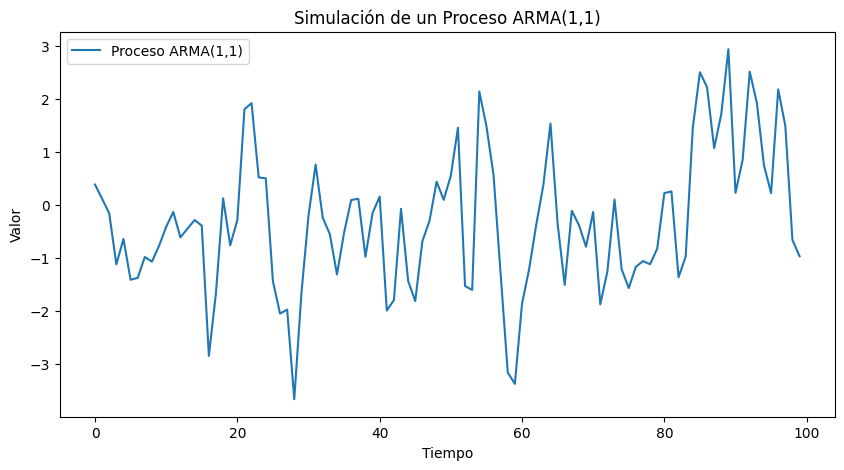

In [43]:
# Definimos un modelo ARMA(1,1)
ar_params = [0.5]  # Parámetro AR
ma_params = [0.3]  # Parámetro MA
arma_process = sm.tsa.ArmaProcess([1, -ar_params[0]], [1, ma_params[0]])
data_arma = arma_process.generate_sample(nsample=100)

# Visualización del proceso generado
plt.figure(figsize=(10,5))
plt.plot(data_arma, label='Proceso ARMA(1,1)')
plt.title("Simulación de un Proceso ARMA(1,1)")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.show()


## Modelo ARIMA Ejemplo Con Datos Reales

In [45]:
# Cargamos el archivo CSV que contiene la serie temporal
df = pd.read_csv('data/TempNY.csv')

# Mostramos las primeras filas del dataset
df.head()


,Year,Average,Unnamed: 2
0,1870,53.60,NaN
1,1871,51.13,NaN
2,1872,50.98,NaN
3,1873,50.98,NaN
4,1874,51.34,NaN


### Limpiar los Datos

In [46]:
# Observamos que hay una columna sin nombre que no es relevante para el análisis
# La eliminamos para limpiar el dataset
df = df.drop(columns=["Unnamed: 2"], axis=1)

# Verificamos que la columna ha sido eliminada
df.head()


,Year,Average
0,1870,53.60
1,1871,51.13
2,1872,50.98
3,1873,50.98
4,1874,51.34


In [48]:
# Cambiamos el índice principal 
df.index = df["Year"]
df = df.drop("Year", axis = 1)

# Mostramos el dataset con el nuevo índice
df.head()


,Average
Year,
1870,53.60
1871,51.13
1872,50.98
1873,50.98
1874,51.34


### Explorar los Datos

<Axes: xlabel='Year'>

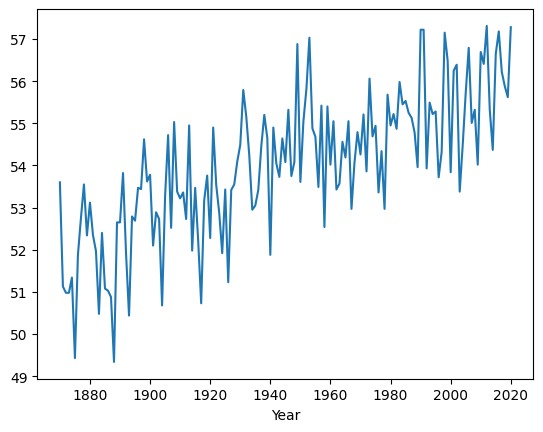

In [50]:
df['Average'].plot()


Comentario: Observamos una clara tendencia al alza en la temperatura a lo largo de los años, lo que sugiere un posible impacto del calentamiento global. <br>
También se nota que los datos muestran estacionariedad, dado que las características estadísticas parecen constante. Corroboraremos esta observación con la prueba de Dickey-Fuller.


### Prueba de Estacionariedad

In [ ]:
# Aplicamos la prueba de Dickey-Fuller 
#   para comprobar la estacionariedad de la serie

#   Si el valor p es mayor a 0.05, la serie no es estacionaria
result = adfuller(df["Average"])
print("Valor p:", result[1])

Valor p: 0.841717253896535


Comentario: El valor p es muy alto, lo que indica que la serie no es estacionaria. Hay que transformar los datos para continuar con la modelación.

### Transformación

In [56]:
# Aplicamos primeras diferencias
df["temp_change"] = df["Average"].diff()
df.head()

,Average,temp_change
Year,,
1870,53.60,NaN
1871,51.13,-2.47
1872,50.98,-0.15
1873,50.98,0.00
1874,51.34,0.36


In [57]:
# Elimina valor initial
df = df.dropna()
df.head()

,Average,temp_change
Year,,
1871,51.13,-2.47
1872,50.98,-0.15
1873,50.98,0.00
1874,51.34,0.36
1875,49.43,-1.91


In [58]:
# Aplicación de la prueba Dickey-Fuller sobre las diferencias
result2 = adfuller(df["temp_change"])
print("Valor p:", result2[1])

Valor p: 8.361907414786516e-14


Comentario: El valor p ha bajado mucho, hasta practicamente zero. Esto indica que la serie ya es estacionaria.

<Axes: xlabel='Year'>

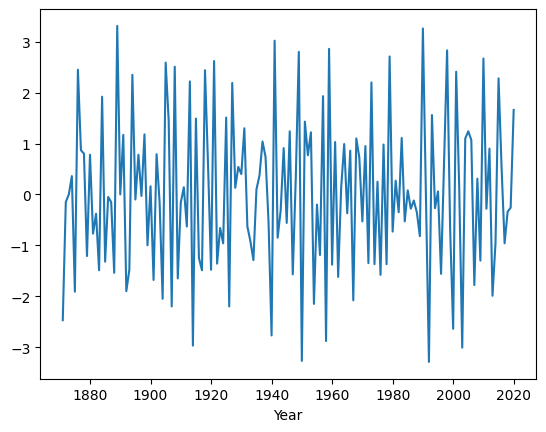

In [59]:
# Graficamos la serie diferenciada
df['temp_change'].plot()


### Conclusion
La serie transformada de diferencias si es estacionaria.

### Visualización

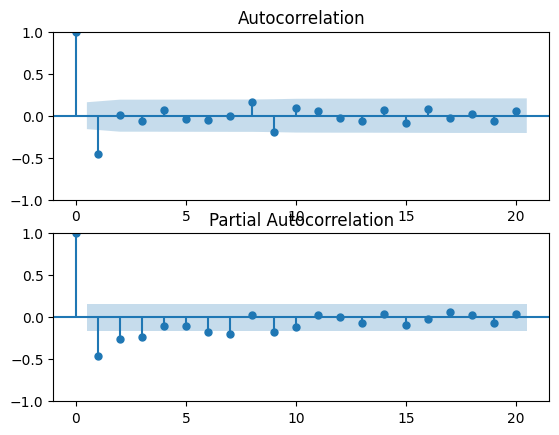

In [62]:
fig, axes = plt.subplots(2,1)

# Graficación de la función de autocorrelación ACF
plot_acf(df['temp_change'], lags=20, ax=axes[0], alpha=0.05)

# Graficación de la función de autocorrelación parcial PACF
plot_pacf(df['temp_change'], lags=20, ax=axes[1], alpha=0.05)

plt.show()

Comentario: La gráfica de ACF muestra la correlación significativa en los primeros lags, y la gráfica PACF se corte abruptamente. Esto sugiere que un modelo AR(1) y MA(1) podría ser el adecuado. Continuamos a probar otros modelos.

## Selección del Modelo

In [63]:
# Ajustar los datos a un modelo AR(1) e imprimir su AIC
mod_ar1 = ARIMA(df['temp_change'], order=(1,0,0))
res_ar1 = mod_ar1.fit()

# Displegue el valor de Aikike
print("El AIC para AR(1) es:", res_ar1.aic)

El AIC para AR(1) es: 519.9693852277926


In [65]:
# Ajustar los datos a un modelo AR(2) e imprimir su AIC
mod_ar2 = ARIMA(df['temp_change'], order=(2,0,0))
res_ar2 = mod_ar2.fit()

# Displegue el valor de Aikike
print("El AIC para AR(2) es:", res_ar2.aic)

El AIC para AR(2) es: 510.48447045590717


In [66]:
# Ajustar los datos a un modelo ARMA(1,1) e imprimir su AIC
mod_arma11 = ARIMA(df['temp_change'], order=(1,0,1))
res_arma11 = mod_arma11.fit()

# Displegue el valor de Aikike
print("El AIC para ARMA(1,1) es:", res_arma11.aic)

El AIC para ARMA(1,1) es: 473.8297495366912


### Conclusion
La serie de tiempo original de temperatures se modela bien con ARIMA(1,1,1)

In [67]:
df2 = pd.read_csv("data/TempNY.csv")
df2 = df2.drop("Unnamed: 2", axis=1)
df2.index = df2["Year"]
df2 = df2.drop("Year", axis = 1)
df2.head()

,Average
Year,
1870,53.60
1871,51.13
1872,50.98
1873,50.98
1874,51.34


In [69]:
mod = ARIMA(df2['Average'], order=(1,1,1))
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                Average   No. Observations:                  151
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -238.826
Date:                Sun, 04 May 2025   AIC                            483.652
Time:                        12:07:14   BIC                            492.683
Sample:                             0   HQIC                           487.321
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0646      0.109      0.590      0.555      -0.150       0.279
ma.L1         -0.8669      0.057    -15.261      0.000      -0.978      -0.756
sigma2         1.4020      0.199      7.043      0.0

## Predicción

In [70]:
# Realizamos una predicción de los próximos valores usando el modelo ARIMA ajustado
predicciones2 = res.forecast(5)
predicciones2

151    56.150446
152    56.077504
153    56.072794
154    56.072490
155    56.072470
Name: predicted_mean, dtype: float64

In [71]:
conf = res.get_forecast(5).conf_int(alpha=0.05)
conf

,lower Average,upper Average
151,53.829710,58.471183
152,53.711871,58.443138
153,53.683072,58.462516
154,53.659996,58.484984
155,53.637485,58.507456
